# BIG FIVE

In [1]:
# BASE PACKAGES:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from pathlib import Path

# CLUSTERING:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture

#WARNING SUPPRESSION:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# PANDAS DISPLAY SETTINGS:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
raw_data=pd.read_csv('C:/Users/TirocinioMatteo/Desktop/Python_3/Vai/ai/big 5/clusterizzazione/dataset/data-final.csv', delimiter='\t')

In [3]:
data = raw_data.copy()
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,...,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,...,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,...,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,...,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,...,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,...,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
print("Dateset originale:",data.shape)

# SOLO DOMANDE  
data_Q=data.drop(data.columns[50:110], axis=1)
print("Dataset con le sole 50 domande:", data_Q.shape)
#data_Q.to_csv('C:/Users/TirocinioMatteo/Desktop/Python_3/BIG_FIVE/Dataset/data_Q.csv', index=False)

# Elimino i record/partecipanti con valori nulli
data_Q_Xmv=data_Q.dropna()
print("Dataset con 50 domande senza valori mancanti:", data_Q_Xmv.shape)

Dateset originale: (1015341, 110)
Dataset con le sole 50 domande: (1015341, 50)
Dataset con 50 domande senza valori mancanti: (1013558, 50)


Elimino record che presentano il valore zero (da discutere se appropriato o meno)

In [5]:
# elimino tutti i record con risposte uguali a 0

data_Q_Xmv_X0 = data_Q_Xmv[(data_Q_Xmv != 0).all(axis=1)]
print("Dataset con 50 domande e Nazione senza valori mancanti e senza zeri:", data_Q_Xmv_X0.shape)

Dataset con 50 domande e Nazione senza valori mancanti e senza zeri: (874434, 50)


CALCOLO IL PUNTEGGIO

In [15]:
# Sommo i valori di determinate rispsote per ciascuna domanda con costante

data_Q_Xmv_X0["EXT_score"]= 20 +data_Q_Xmv_X0["EXT1"]-data_Q_Xmv_X0["EXT2"]+data_Q_Xmv_X0["EXT3"]-data_Q_Xmv_X0["EXT4"]+data_Q_Xmv_X0["EXT5"]-data_Q_Xmv_X0["EXT6"]+data_Q_Xmv_X0["EXT7"]-data_Q_Xmv_X0["EXT8"]+data_Q_Xmv_X0["EXT9"]-data_Q_Xmv_X0["EXT10"]

data_Q_Xmv_X0["AGR_score"]= 14 -data_Q_Xmv_X0["AGR1"]+data_Q_Xmv_X0["AGR2"]-data_Q_Xmv_X0["AGR3"]+data_Q_Xmv_X0["AGR4"]-data_Q_Xmv_X0["AGR5"]+data_Q_Xmv_X0["AGR6"]-data_Q_Xmv_X0["AGR7"]+data_Q_Xmv_X0["AGR8"]+data_Q_Xmv_X0["AGR9"]+data_Q_Xmv_X0["AGR10"]

data_Q_Xmv_X0["CSN_score"]= 14 +data_Q_Xmv_X0["CSN1"]-data_Q_Xmv_X0["CSN2"]+data_Q_Xmv_X0["CSN3"]-data_Q_Xmv_X0["CSN4"]+data_Q_Xmv_X0["CSN5"]-data_Q_Xmv_X0["CSN6"]+data_Q_Xmv_X0["CSN7"]-data_Q_Xmv_X0["CSN8"]+data_Q_Xmv_X0["CSN9"]+data_Q_Xmv_X0["CSN10"]

data_Q_Xmv_X0["EST_score"]= 38 -data_Q_Xmv_X0["EST1"]+data_Q_Xmv_X0["EST2"]-data_Q_Xmv_X0["EST3"]+data_Q_Xmv_X0["EST4"]-data_Q_Xmv_X0["EST5"]-data_Q_Xmv_X0["EST6"]-data_Q_Xmv_X0["EST7"]-data_Q_Xmv_X0["EST8"]-data_Q_Xmv_X0["EST9"]-data_Q_Xmv_X0["EST10"]    

data_Q_Xmv_X0["OPN_score"]= 8 +data_Q_Xmv_X0["OPN1"]-data_Q_Xmv_X0["OPN2"]+data_Q_Xmv_X0["OPN3"]-data_Q_Xmv_X0["OPN4"]+data_Q_Xmv_X0["OPN5"]-data_Q_Xmv_X0["OPN6"]+data_Q_Xmv_X0["OPN7"]+data_Q_Xmv_X0["OPN8"]+data_Q_Xmv_X0["OPN9"]+data_Q_Xmv_X0["OPN10"]

""" 
# Senza costante 
data_Q_Xmv_X0["EXT_score"]= +data_Q_Xmv_X0["EXT1"]-data_Q_Xmv_X0["EXT2"]+data_Q_Xmv_X0["EXT3"]-data_Q_Xmv_X0["EXT4"]+data_Q_Xmv_X0["EXT5"]-data_Q_Xmv_X0["EXT6"]+data_Q_Xmv_X0["EXT7"]-data_Q_Xmv_X0["EXT8"]+data_Q_Xmv_X0["EXT9"]-data_Q_Xmv_X0["EXT10"]

data_Q_Xmv_X0["AGR_score"]= -data_Q_Xmv_X0["AGR1"]+data_Q_Xmv_X0["AGR2"]-data_Q_Xmv_X0["AGR3"]+data_Q_Xmv_X0["AGR4"]-data_Q_Xmv_X0["AGR5"]+data_Q_Xmv_X0["AGR6"]-data_Q_Xmv_X0["AGR7"]+data_Q_Xmv_X0["AGR8"]+data_Q_Xmv_X0["AGR9"]+data_Q_Xmv_X0["AGR10"]

data_Q_Xmv_X0["CSN_score"]= +data_Q_Xmv_X0["CSN1"]-data_Q_Xmv_X0["CSN2"]+data_Q_Xmv_X0["CSN3"]-data_Q_Xmv_X0["CSN4"]+data_Q_Xmv_X0["CSN5"]-data_Q_Xmv_X0["CSN6"]+data_Q_Xmv_X0["CSN7"]-data_Q_Xmv_X0["CSN8"]+data_Q_Xmv_X0["CSN9"]+data_Q_Xmv_X0["CSN10"]

data_Q_Xmv_X0["EST_score"]= -data_Q_Xmv_X0["EST1"]+data_Q_Xmv_X0["EST2"]-data_Q_Xmv_X0["EST3"]+data_Q_Xmv_X0["EST4"]-data_Q_Xmv_X0["EST5"]-data_Q_Xmv_X0["EST6"]-data_Q_Xmv_X0["EST7"]-data_Q_Xmv_X0["EST8"]-data_Q_Xmv_X0["EST9"]-data_Q_Xmv_X0["EST10"]    

data_Q_Xmv_X0["OPN_score"]= +data_Q_Xmv_X0["OPN1"]-data_Q_Xmv_X0["OPN2"]+data_Q_Xmv_X0["OPN3"]-data_Q_Xmv_X0["OPN4"]+data_Q_Xmv_X0["OPN5"]-data_Q_Xmv_X0["OPN6"]+data_Q_Xmv_X0["OPN7"]+data_Q_Xmv_X0["OPN8"]+data_Q_Xmv_X0["OPN9"]+data_Q_Xmv_X0["OPN10"]

"""

C:\Users\TirocinioMatteo\AppData\Local\Temp\ipykernel_8732\3696483791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Q_Xmv_X0["EXT_score"]= 20 +data_Q_Xmv_X0["EXT1"]-data_Q_Xmv_X0["EXT2"]+data_Q_Xmv_X0["EXT3"]-data_Q_Xmv_X0["EXT4"]+data_Q_Xmv_X0["EXT5"]-data_Q_Xmv_X0["EXT6"]+data_Q_Xmv_X0["EXT7"]-data_Q_Xmv_X0["EXT8"]+data_Q_Xmv_X0["EXT9"]-data_Q_Xmv_X0["EXT10"]
C:\Users\TirocinioMatteo\AppData\Local\Temp\ipykernel_8732\3696483791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Q_Xmv_X0["

In [7]:
data_Q_Xmv_X0.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT_score,AGR_score,CSN_score,EST_score,OPN_score
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,16.0,15.0,8.0,-12.0,27.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,-10.0,20.0,13.0,-13.0,17.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,-5.0,18.0,10.0,-14.0,23.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,-4.0,14.0,1.0,-17.0,21.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,-1.0,22.0,24.0,-7.0,30.0


In [16]:
data_to_test = data_Q_Xmv_X0.drop(['EXT_score', 'AGR_score', 'CSN_score', 'EST_score', 'OPN_score' ], axis=1)
data_to_test = data_to_test.astype('int8') # per ridurre la memoria utilizzata
data_to_test.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


# Kmeans

## Trovo k OTTIMALE 

1. Elbow method

k=2: wcss=54730256.83732568
k=3: wcss=51860343.89415699
k=4: wcss=49913742.98866552
k=5: wcss=48512432.66189126
k=6: wcss=47613556.65502217
k=7: wcss=46767778.37997849
k=8: wcss=46068006.816394955
k=9: wcss=45418499.87866879
k=10: wcss=44869375.86909913


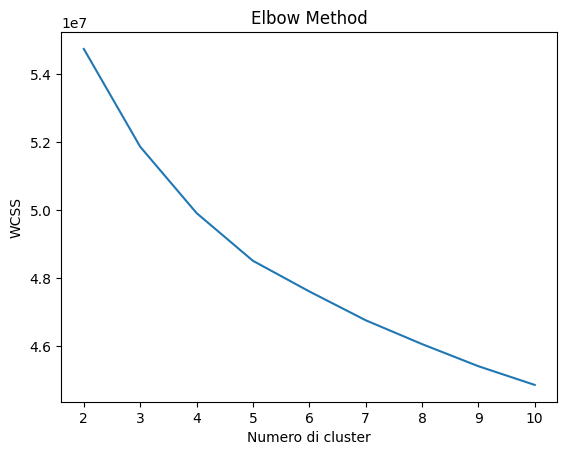

In [9]:
from sklearn.cluster import KMeans
wcss_List=[]

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_to_test)
    wcss = kmeans.inertia_ # wcss = within-cluster sum of squares (somma dei quadrati all'interno del cluster)
    print(f'k={k}: wcss={wcss}')
    wcss_List.append(wcss)
    
""" 
# stampa i risultati di wcss[k+1] - wcss[k]
for i in range(0, len(wcss_List)):
    print(wcss_List[i])
    print(f'k={i+3}-{i+2}: wcss_diff={wcss_List[i+1]-wcss_List[i]}')
    #print(f'k={i+2}-{i+1}: wcss_diff={wcss_List[i]-wcss_List[i-1]}') 
"""
   
plt.plot(range(2, 11), wcss_List)
plt.xlabel('Numero di cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – silhouette and calinski_harabasz. The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters.

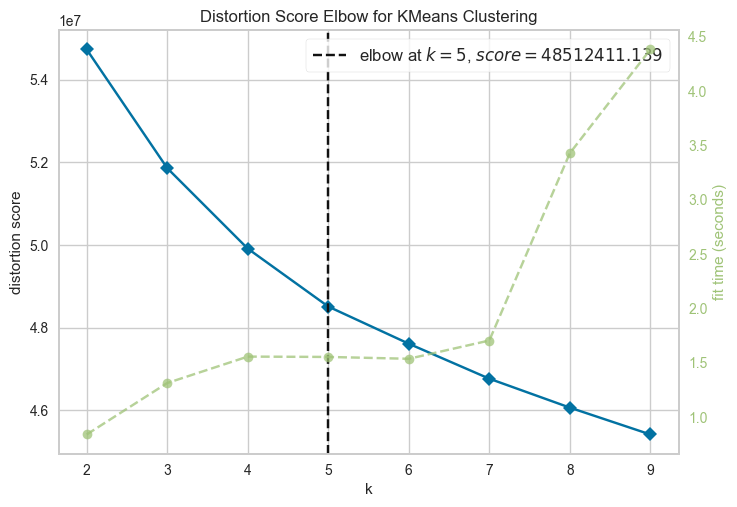

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(data_to_test)        
visualizer.show()  

In [17]:
Clusters_df = pd.DataFrame()
Clusters_df['EXT_score'] = data_Q_Xmv_X0["EXT_score"]
Clusters_df['AGR_score'] = data_Q_Xmv_X0["AGR_score"]
Clusters_df['CSN_score'] = data_Q_Xmv_X0["CSN_score"]
Clusters_df['EST_score'] = data_Q_Xmv_X0["EST_score"]
Clusters_df['OPN_score'] = data_Q_Xmv_X0["OPN_score"]


# K-means


- Definisco i cluster (k=5)

In [18]:
from sklearn.cluster import KMeans

# Definisco 5 cluster
kmeans = KMeans(n_clusters=5, random_state=42)
k_fit = kmeans.fit(data_to_test)

In [19]:
predictions = k_fit.labels_
Clusters_df['Clusters_Kmeans'] = predictions
Clusters_df.head()

,EXT_score,AGR_score,CSN_score,EST_score,OPN_score,Clusters_Kmeans
0,36.0,29.0,22.0,26.0,35.0,4
1,10.0,34.0,27.0,25.0,25.0,2
2,15.0,32.0,24.0,24.0,31.0,2
3,16.0,28.0,15.0,21.0,29.0,1
4,19.0,36.0,38.0,31.0,38.0,4


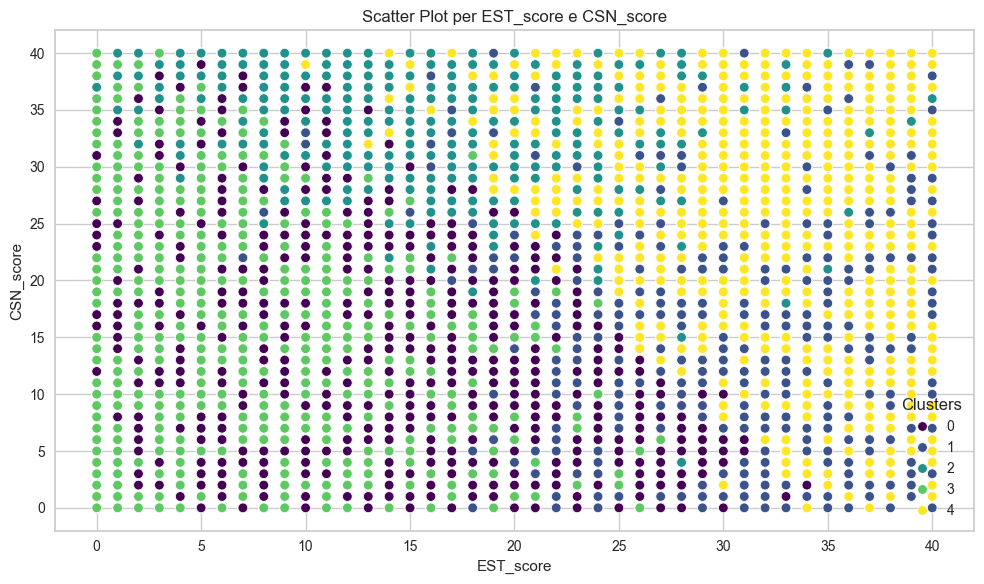

In [20]:
# plotta sulle x EST_score e sulle y CSN_score

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Clusters_df, x='EST_score', y='CSN_score', hue='Clusters_Kmeans', palette='viridis')
plt.title('Scatter Plot per EST_score e CSN_score')
plt.xlabel('EST_score')
plt.ylabel('CSN_score')
plt.legend(title='Clusters')
plt.tight_layout()
plt.show()

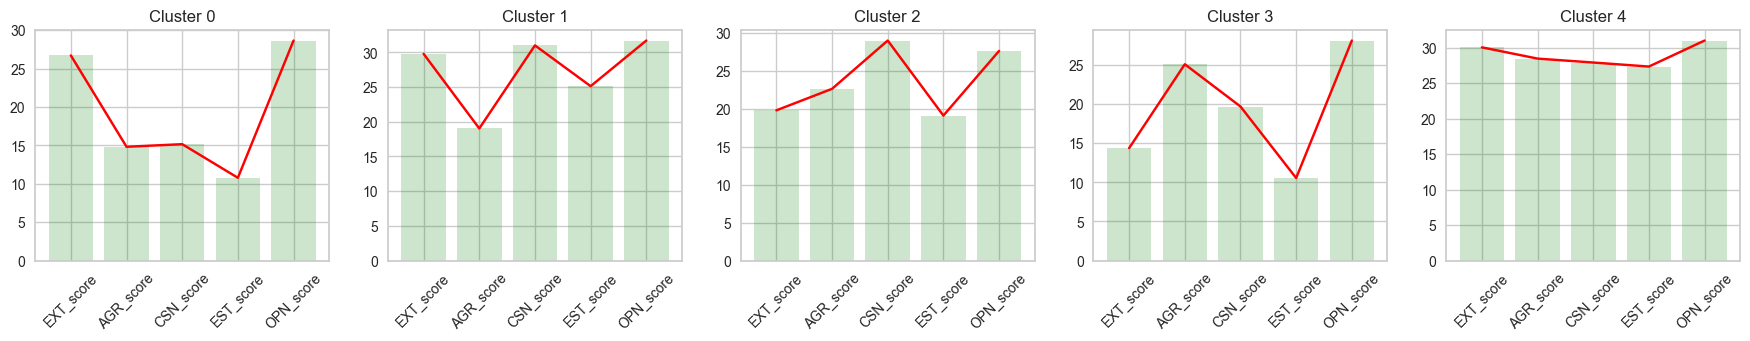

In [14]:
dataclusters = Clusters_df.groupby('Clusters_Kmeans').mean()

plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    #plt.ylim(0,4);

# Afffinity propagation

In [15]:
data_to_test.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5,1,5,1,5,1,5,3,5,5


In [16]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# prendi 1000 campioni di data_to_test
#data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

# Crea l'oggetto AffinityPropagation
af = AffinityPropagation(damping=0.5, preference=None)

af.fit(data_to_test)

af_cluster_labels = af.labels_
af_cluster_centers_indices = af.cluster_centers_indices_

# Ottieni il numero di cluster trovati
n_clusters_AP1 = len(set(af_cluster_labels)) - (1 if -1 in af_cluster_labels else 0)
n_clusters_AP2 = len(af_cluster_centers_indices)

print("Number of clusters detected by the algorithm:", n_clusters_AP1)
print("Number of clusters detected by the algorithm:", n_clusters_AP2)

Clusters_df['Clusters_AffProp'] = af_cluster_labels
Clusters_df.head()

MemoryError: Unable to allocate 5.56 TiB for an array with shape (874434, 874434) and data type float64

# Mean-shift

In [17]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics

# prendi 1000 campioni di data_to_test
#data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

bandwidth = estimate_bandwidth(data_to_test, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth)
ms.fit(data_to_test)

ms_cluster_centers = ms.cluster_centers_
ms_cluster_labels = ms.labels_

n_clusters_MS = len(ms_cluster_centers)
n_cluster_ms=len(set(ms_cluster_labels))

print("Number of clusters detected by the algorithm:", n_clusters_MS)
print("Number of clusters detected by the algorithm:", n_cluster_ms)

Clusters_df['Clusters_MeanShift'] = ms_cluster_labels
Clusters_df.head()


MemoryError: Unable to allocate 6.67 MiB for an array with shape (1, 874434) and data type float64

# Spectral clustering

In [ ]:
"""
The present version of SpectralClustering requires the number of clusters to be specified in advance.
It works well for a small number of clusters, but is not advised for many clusters.

"""

from sklearn.cluster import SpectralClustering
from sklearn.utils import shuffle

# prendi 1000 campioni di data_to_test
#data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

n_clusters = 2

sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)

sc.fit(data_to_test)

sc_cluster_labels = sc.labels_

n_cluster_sc=len(set(sc_cluster_labels))

print("Number of clusters detected by the algorithm:", n_cluster_sc)

Clusters_df['Clusters_SpectClust'] = sc_cluster_labels
Clusters_df.head()



# Agglomerative clustering

# DBSCAN

In [ ]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

#data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

# eps (distanza massima tra due campioni per essere considerati nello stesso cluster)
# min_samples (numero minimo di campioni in un vicinato per un punto per essere considerato un core point)
eps = 0.5  # Distanza massima tra due punti per essere considerati nello stesso cluster
min_samples = 5  # Numero minimo di punti in un vicinato per essere considerato un core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

dbscan.fit(data_to_test)

# Esegui il clustering
dbscan_cluster_labels=dbscan.labels_ 

print("Number of clusters detected by the algorithm:", len(set(dbscan_cluster_labels)))

Clusters_df['Clusters_Dbscan'] = dbscan_cluster_labels

Clusters_df.head()



# HDBSCAN

# OPTICS

# Gaussian mixtures

In [ ]:
from sklearn.mixture import GaussianMixture

#data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

# Crea l'oggetto GaussianMixture
# Puoi impostare i parametri come il numero di componenti e la covarianza
n_components = 4  # Numero di componenti (cluster) desiderato
gmm = GaussianMixture(n_components=n_components)

gmm.fit(data_to_test)

gmm_cluster_labels = gmm.predict(data_to_test)

print("Number of clusters detected by the algorithm:", len(set(gmm_cluster_labels)))

Clusters_df['Clusters_GMM'] = gmm_cluster_labels

Clusters_df.head()

# BIRCH

# Bisecting K-Means